# Import required libraries

In [106]:
import pandas as pd
import sklearn.model_selection as skms
import sklearn.metrics as skmt
import matplotlib.pyplot as plt
import seaborn as sns

# Utility functions

In [ ]:
def compute_confusion_matrix(sufix,y_test, y_pred):

    labels = [False, True]

    # Compute the confusion matrix
    conf_matrix = skmt.confusion_matrix(y_test, y_pred, labels=labels)
    print(f"[{sufix}]confusion matrix:\n",conf_matrix)

    if len(conf_matrix[0]) == 1:
        print("Skipping ConfusionMatrixDisplay because a single label was found in 'y_true' and 'y_pred'.")
        return

    # Create a display object for the confusion matrix
    disp = skmt.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Granted", "Granted"])

    # Plot the confusion matrix
    disp.plot(cmap=plt.cm.Blues, values_format=".0f")
    plt.title(f"[{sufix}] Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


def plot_class_distribution_train_test_sets(X_train, y_train, X_test, y_test):
    # Combine X_train with y_train
    train_df = pd.concat([X_train, y_train], axis=1)

    # Combine X_test with y_test
    test_df = pd.concat([X_test, y_test], axis=1)

    # Add a column to indicate the source of the data (train or test)
    train_df['Set'] = 'Train'
    test_df['Set'] = 'Test'

    # Concatenate the two DataFrames
    combined_data = pd.concat([train_df, test_df])

    # Define custom colors for Train and Test
    custom_colors = ['#e74c3c', '#228B22']  # e.g., red for False, green for True

    # Plot the class distribution
    plt.figure()
    ax = sns.countplot(data=combined_data, x='Set', hue='scholarship', palette=custom_colors)
    plt.title('Class Distribution in Train and Test Sets')
    plt.xlabel('Scholarship')
    plt.ylabel('Count')
    plt.legend(title='Dataset')

    # Specify title and labels
    plt.title('Class Distribution in Train and Test Sets')
    plt.xlabel('Datasets')
    plt.ylabel('Count')
    plt.legend(title='Scholarship')  

    # Add count values on top of each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

    # Show the plot
    plt.show()

def evaluate_classifier(y_test, y_pred):
    # Compute and print Accuracy
    accuracy_score = skmt.accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f' % (accuracy_score*100))

    # Compute and print Balanced Accuracy
    balanced_accuracy = skmt.balanced_accuracy_score(y_test, y_pred)
    print('Balanced Accuracy: %.2f' % (balanced_accuracy*100))

    # Compute and show confusion matrix
    compute_confusion_matrix('General',y_test, y_pred)

# Load dataset

In [108]:
dataset_ulr = 'https://raw.githubusercontent.com/leticiaarco/practical_ethical_ai_resources/refs/heads/main/scholarship.csv'
data = pd.read_csv(dataset_ulr)
data.head()
df = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       120 non-null    float64
 1   gender       120 non-null    object 
 2   married      120 non-null    object 
 3   achievement  120 non-null    float64
 4   scholarship  120 non-null    bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 4.0+ KB


# Handle data

### Exercise 1.1 Look at our dataset: Are the classes equally distributed?

<Axes: ylabel='Count'>

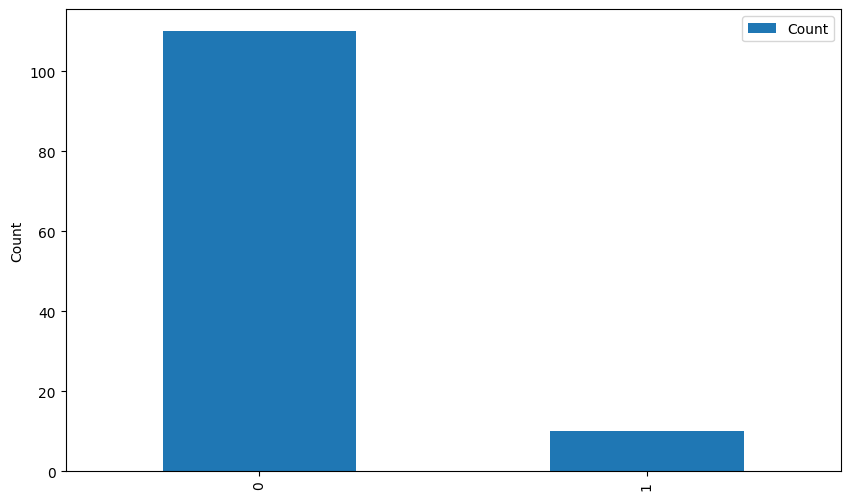

In [109]:
# plotting class distribution
scholarship_index = df['scholarship'].value_counts().index
scholarship_count = df['scholarship'].value_counts().values

df = pd.DataFrame({
    'scholarship': scholarship_index,
    'Count' : scholarship_count
})

df.plot(kind='bar', figsize=(10,6), ylabel='Count')

Transform feature values

In [110]:
transformed_data = data

transformed_data['gender'] = transformed_data['gender'].map({
    'F':1,
    'M':0,
})

transformed_data['married'] = transformed_data['married'].map({
    'Y':1,
    'N':0,
})

Split dataset by predictive features (X) and objective feature (y)

In [111]:
X = transformed_data.drop('scholarship', axis=1)
y = transformed_data['scholarship']

Split dataset in train and test sets

In [112]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=0)

# Train the classifier

Imports

In [113]:
import tensorflow.keras.models as tkm
import tensorflow.keras.layers as tkl

Initialize keras sequential model

In [114]:
model = tkm.Sequential()
model.add(tkl.Input(shape=(4,)))
model.add(tkl.Dense(12, activation='relu'))
model.add(tkl.Dense(8, activation='relu'))
model.add(tkl.Dense(1, activation='sigmoid'))

Compile model and fit it on the dataset

In [115]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0458 - loss: 961.5907     
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6592 - loss: 11.5417     
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9600 - loss: 16.1024    
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9264 - loss: 32.8969    
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9450 - loss: 26.5341    
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9356 - loss: 29.3820    
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9263 - loss: 31.1449    
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9368 - loss: 24.0570 
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9401 - loss: 20.2075    
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9569 - loss: 12.8225    
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9504 - loss: 12.3063    
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2

# Evaluate the classifier

Evaluate the keras model

In [116]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9051 - loss: 9.2497  
Accuracy: 88.89


### Exercise 1.2 Compute the confusion matrix

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/stepWARNING:tensorflow:5 out of the last 15 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002535CE07F60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[General]confusion matrix:
 [[32  0]
 [ 4  0]]


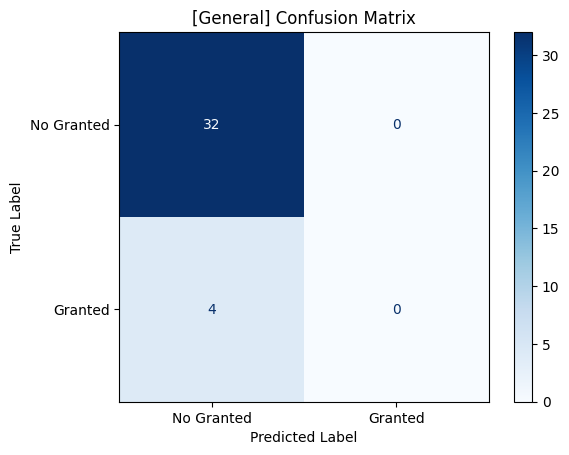

In [117]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=-1)
compute_confusion_matrix('General',y_test, y_pred)

### Exercise 1.3 Compute Balance Accuraccy

In [ ]:
balanced_accuracy = skmt.balanced_accuracy_score(y_test, y_pred)
print('Balanced Accuracy score: %.2f' % (balanced_accuracy*100))

balanced_accuracy_score:  0.5


# Exercise 1.4  Apply SMOTE

Imports

In [119]:
import imblearn.over_sampling as imbos

In [120]:
smote = imbos.SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution before SMOTE:
scholarship
False    78
True      6
Name: count, dtype: int64
Class distribution after SMOTE:
scholarship
False    78
True     78
Name: count, dtype: int64


Fit model on the re-sampled train-set

In [121]:
model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=10)

Epoch 1/150


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5351 - loss: 27.8724 
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5675 - loss: 8.8444  
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6729 - loss: 1.3309
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6647 - loss: 1.4571
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5934 - loss: 3.3860 
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5351 - loss: 2.2669 
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5069 - loss: 9.8145  
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.4738 - loss: 9.8983
Epoch 9/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5335 - loss: 9.9474 
Epoch 10/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4838 - loss: 3.9945 
Epoch 11/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6549 - loss: 0.6935 
Epoch 12/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

Evaluate the keras model

In [122]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9051 - loss: 0.5477 
Accuracy: 88.89


Compute confusion matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
[complete]confusion matrix:
 [[32  0]
 [ 4  0]]


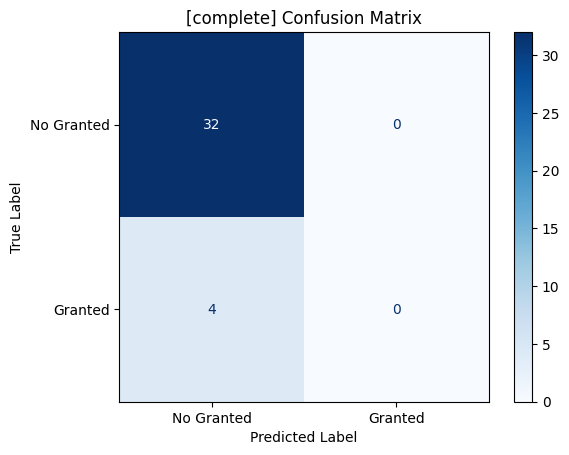

In [123]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=-1)
compute_confusion_matrix('complete',y_test, y_pred)

# Exercise 1.5: Are the train and test sets well distributed?

Import

In [124]:
from collections import Counter

Split the dataset in test and train sets

In [125]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=3)

Print class distribution per train and test sets

In [126]:
print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))

Counter({False: 110, True: 10})
Counter({False: 75, True: 9})
Counter({False: 35, True: 1})


Plot class distribution in train and test sets

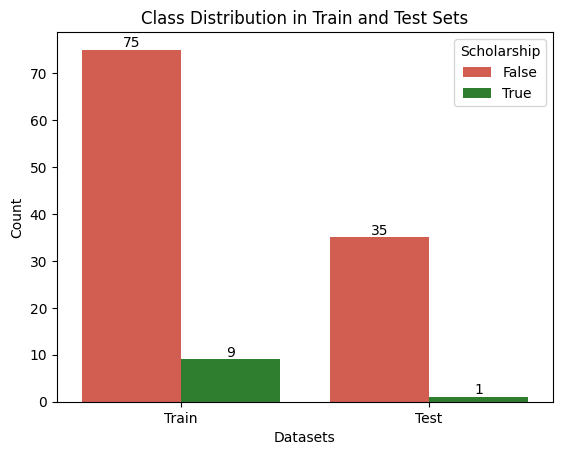

In [127]:
plot_class_distribution_train_test_sets(X_train, y_train, X_test, y_test)

# Exercise 1.6: Apply stratified splitting

Split train and test sets using the parameter 'stratify=y' 

In [128]:
X_stratified_train, X_stratified_test, y_stratified_train, y_stratified_test = skms.train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Print class distribution per train and test sets after applying stratified splitting

In [129]:
print(Counter(y))
print(Counter(y_stratified_train))
print(Counter(y_stratified_test))

Counter({False: 110, True: 10})
Counter({False: 77, True: 7})
Counter({False: 33, True: 3})


Plot class distribution in train and test sets after applying stratified splitting

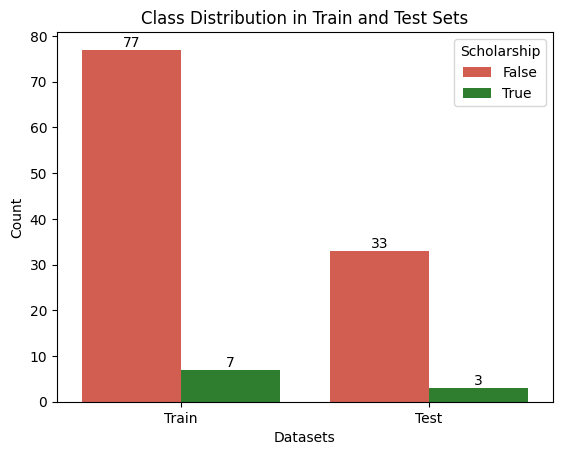

In [130]:
plot_class_distribution_train_test_sets(X_stratified_train, y_stratified_train, X_stratified_test, y_stratified_test)

# Exercise 1.7: Play with other classifiers, compare and explain results

Import

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## K-nearest neighbours (K-NN)

Initialize and fit K-NN

In [132]:
# Initialize K-NN
knn = KNeighborsClassifier(n_neighbors=3)

# Fit K-NN on the train set
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Make predictions and evaluate results

Accuracy: 86.11
Balanced Accuracy: 44.29
[General]confusion matrix:
 [[31  4]
 [ 1  0]]


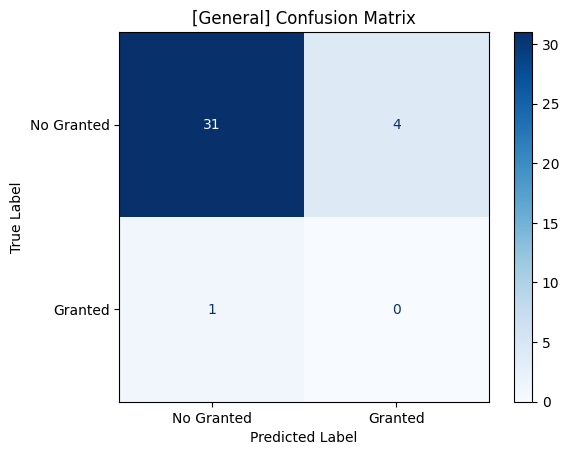

In [133]:
# Make predictions on test set
y_pred = knn.predict(X_test)

# Compute accuracy, balance accuracy and confusion matrix
evaluate_classifier(y_test, y_pred)

### Playing with K-NN -> Give different weights to the training instances

Initialize and fit K-NN

In [134]:
# Initialize K-NN
knn = KNeighborsClassifier(n_neighbors=3, weights='distance') # giving different weights to the training instances

# Fit K-NN on the train set
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

Make predictions and evaluate results

Accuracy: 97.22
Balanced Accuracy: 50.00
[General]confusion matrix:
 [[35  0]
 [ 1  0]]


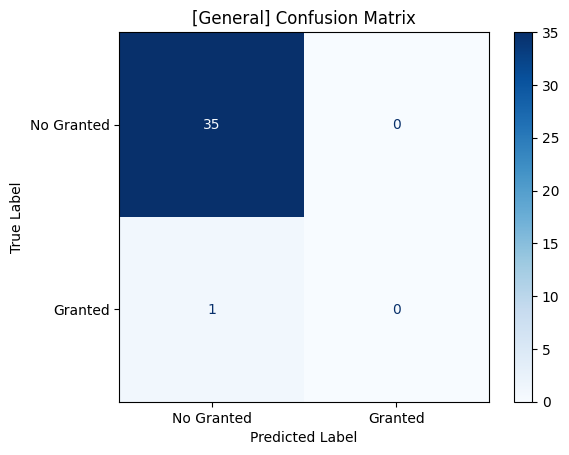

In [135]:
# Make predictions on test set
y_pred = knn.predict(X_test)

# Compute accuracy, balance accuracy and confusion matrix
evaluate_classifier(y_test, y_pred)

## Random Forest

Initialize and fit Random Forest

In [136]:
# Initialize Random Forest
rfc = RandomForestClassifier(random_state=2)

# Fit Random Forest on the train set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

Make predictions and evaluate results

Accuracy: 100.00
Balanced Accuracy: 100.00
[General]confusion matrix:
 [[35  0]
 [ 0  1]]


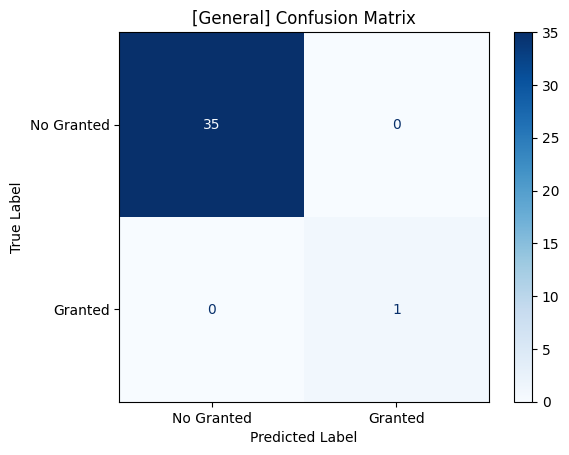

In [137]:
# Make predictions on test set
y_pred = rfc.predict(X_test)

# Compute accuracy, balance accuracy and confusion matrix
evaluate_classifier(y_test, y_pred)

### Playing with Random Forest -> Apply class weighting and balanced bootstrapping

Initialize and fit Random Forest

In [138]:
# Initialize Random Forest
rfc = RandomForestClassifier(random_state=4, class_weight='balanced') # applying class weighting and balanced bootstrapping

# Fit Random Forest on the train set
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=4)

Make predictions and evaluate results

Accuracy: 100.00
Balanced Accuracy: 100.00
[General]confusion matrix:
 [[35  0]
 [ 0  1]]


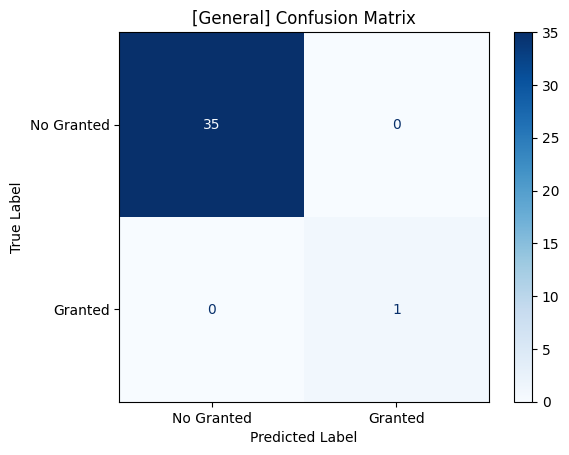

In [139]:
# Make predictions on test set
y_pred = rfc.predict(X_test)

# Compute accuracy, balance accuracy and confusion matrix
evaluate_classifier(y_test, y_pred)

## Decision tree

Initialize and fit Decision Tree

In [140]:
# Initialize Decision Tree
dtree = DecisionTreeClassifier(random_state=0)

# Fit Decision Tree on the train set
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

Make predictions and evaluate results

Accuracy: 100.00
Balanced Accuracy: 100.00
[General]confusion matrix:
 [[35  0]
 [ 0  1]]


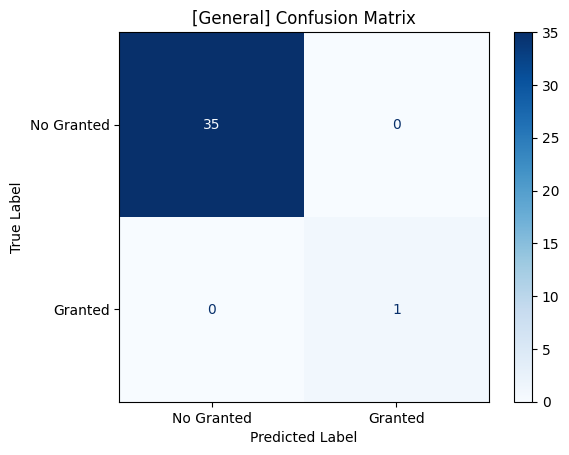

In [141]:
# Make predictions on test set
y_pred = dtree.predict(X_test)

# Compute accuracy, balance accuracy and confusion matrix
evaluate_classifier(y_test, y_pred)

### Playing with Decision tree -> Set class weights to focus more on the minority class

Initialize and fit Decision Tree

In [142]:
# Initialize Decision Tree
dtree = DecisionTreeClassifier(random_state=0, class_weight='balanced')

# Fit Decision Tree on the train set
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

Make predictions and evaluate results

Accuracy: 100.00
Balanced Accuracy: 100.00
[General]confusion matrix:
 [[35  0]
 [ 0  1]]


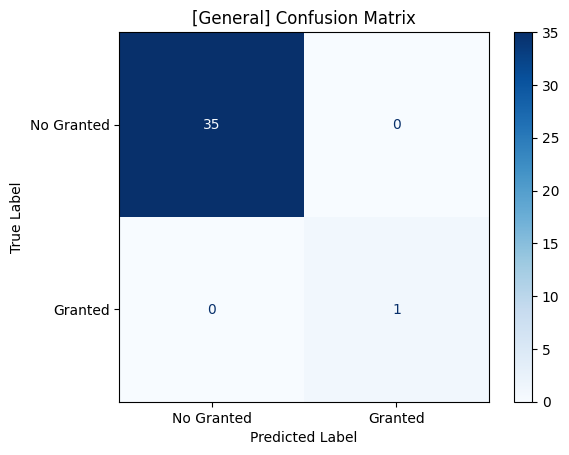

In [143]:
# Make predictions on test set
y_pred = dtree.predict(X_test)

# Compute accuracy, balance accuracy and confusion matrix
evaluate_classifier(y_test, y_pred)